In [115]:
import numpy as np
import pandas as pd
from collections import Counter


def euclidean_distance(a, b):
    """Distancia euclideana entre dos arrays.

    Parametros
    ----------
    a: numpy array
    b: numpy array

    Returns
    -------
    distancia: float
    """
    return np.linalg.norm(a-b)


def cosine_distance(a, b):
    """Similitud coseno entre dos arrays.

    Parametros
    ----------
    a: numpy array
    b: numpy array

    Returns
    -------
    distancia: float
    """
    return (a@b)/(np.linalg.norm(a)*np.linalg.norm(b))


def manhattan_distance(a, b):
    """Distancia Manhattan entre dos arrays.

    Parametros
    ----------
    a: numpy array
    b: numpy array

    Returns
    -------
    distancia: float
    """
    return sum( abs(e1-e1) for e1,e2 in zip(a,b))


class KNNRegressor:
    """Regresor para KNN.

    Parametros
    ----------
    k: int, opcional (default = 5)
        Vecinos a incluir en la predicción.
    distancia: function, opcional (default = euclidean)
        Métrica de distancia a utilizar.
    """

    def __init__(self, k=5, distance=euclidean_distance):
        """Inicializar el objeto KNNRegressor."""
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        """Ajustar el modelo con "X" como entrenamiento e "y" como objetivo.

        De acuerdo con el algoritmo KNN, los datos de entrenamiento son almacenados.

        Parametros
        ----------
        X: numpy array, shape = (n_observaciones, n_features)
            Conjunto de entrenamiento.
        y: numpy array, shape = (n_observaciones,)
            Valores objetivo.

        Returns
        -------
        self
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """Devuelve el valor predecido para la entrada X (conjunto de prueba).

        Asume que la forma de X es [n_observaciones de prueba, n_características] donde
        n_features es la misma que las n_features de los datos de
        de entrada.

        Parametros
        ----------
        X: numpy array, shape = (n_observaciones, n_features)
            Conjunto de prueba.

        Returns
        -------
        result: numpy array, shape = (n_observaciones,)
            Valores predecidos para cada dato de entrada.

        """
        self.X_test = X
        values_x=[]
        positions=[]
        results = []

        for i in self.X_test.values:
            for posicion,j in enumerate(self.X_train):
                
                values_x.append(self.distance(i,j))
                positions.append(posicion)
            df = pd.DataFrame.from_dict({'Positions': positions, 'x_value': values_x})
            df = df.sort_values(by='x_value')
            df = df.iloc[:self.k,:]
            df['y_values'] = self.y_train[df['Positions']]
            mean = df['y_values'].mean()
            results.append(mean)
            
        return np.array(results)

In [30]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
iris_df =  pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

x = iris_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y=iris_df[['target']]

iris_df['target'].unique() #valores de 0 a 2 a los tipos de iris
pd.options.mode.chained_assignment = None


In [75]:
x_train=x.sample(int(round(x.shape[0]*0.33)))
y_train=y

x_train['index']= x_train.index
y_train['index']= y.index

y_train=y_train[y_train['index'].isin(x_train['index'])].drop('index',axis=1)
x_train=x_train.sort_values(by='index').drop('index',axis=1)

In [116]:
modelo=KNNRegressor()
modelo.fit(X=x_train,y=y_train)

In [ ]:
x_test=x.sample(int(round(x.shape[0]*0.33)))

In [172]:
z=modelo.predict(x_test)
z=pd.DataFrame(z)
z=z.rename(columns={z.columns[0]:'predict'})

In [178]:
y_targets=y[y['index'].isin(x_test.index)]
final=pd.concat([x_test,y_targets],axis=1)
final

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,index
99,5.7,2.8,4.1,1.3,1.0,99
84,5.4,3.0,4.5,1.5,1.0,84
101,5.8,2.7,5.1,1.9,2.0,101
141,6.9,3.1,5.1,2.3,2.0,141
130,7.4,2.8,6.1,1.9,2.0,130
133,6.3,2.8,5.1,1.5,2.0,133
39,5.1,3.4,1.5,0.2,0.0,39
47,4.6,3.2,1.4,0.2,0.0,47
119,6.0,2.2,5.0,1.5,2.0,119
59,5.2,2.7,3.9,1.4,1.0,59


In [182]:
comparaciones=pd.concat([final.reset_index(),z],axis=1)
comparaciones

,level_0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,index,predict
0,99,5.7,2.8,4.1,1.3,1.0,99,1.0
1,84,5.4,3.0,4.5,1.5,1.0,84,1.0
2,101,5.8,2.7,5.1,1.9,2.0,101,1.2
3,141,6.9,3.1,5.1,2.3,2.0,141,1.2
4,130,7.4,2.8,6.1,1.9,2.0,130,1.2
5,133,6.3,2.8,5.1,1.5,2.0,133,1.2
6,39,5.1,3.4,1.5,0.2,0.0,39,1.0
7,47,4.6,3.2,1.4,0.2,0.0,47,0.6
8,119,6.0,2.2,5.0,1.5,2.0,119,0.6
9,59,5.2,2.7,3.9,1.4,1.0,59,0.8


# Parte 3

euclidean_distance
Predictions [-1.12080272 -0.89286722 -0.93680323 -0.93680323 -0.88878522]
Actual [-1.18881796 -0.89818277 -0.96533688 -0.60677133 -0.6973949 ]
**************************************************


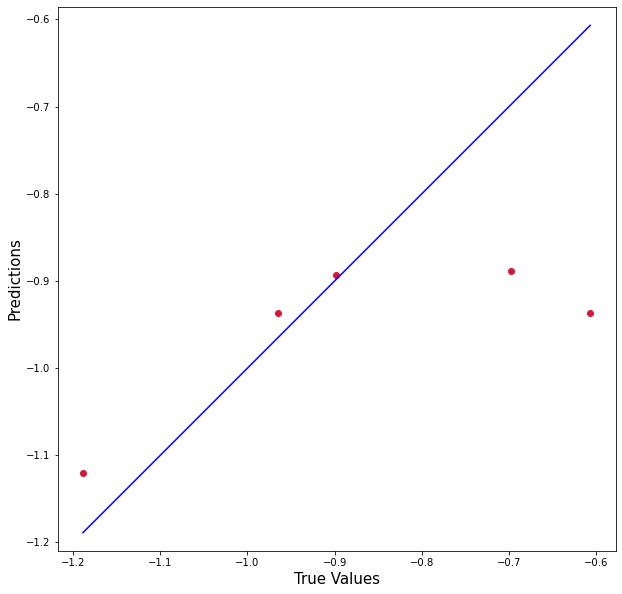

manhattan_distance
Predictions [-0.50421738 -0.68472033 -0.37377043 -0.35684222 -0.51781803]
Actual [-1.18881796 -0.89818277 -0.96533688 -0.60677133 -0.6973949 ]
**************************************************


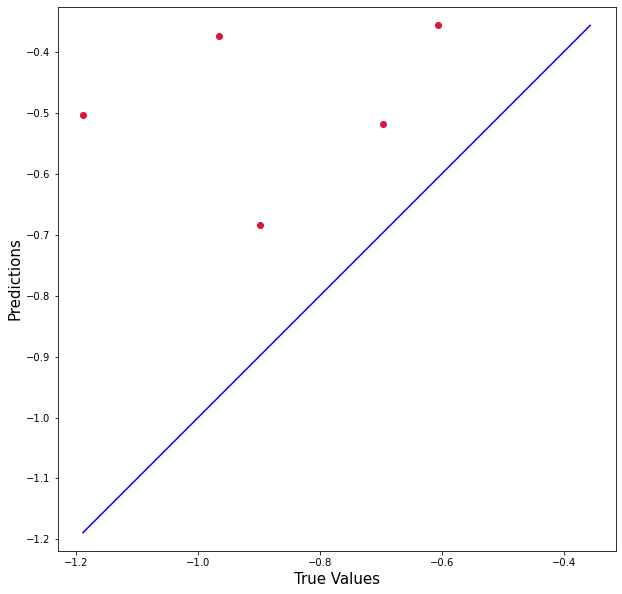

cosine_distance
Predictions [-0.46418602 -0.41346217 -0.37110343 -0.37110343 -0.37110343]
Actual [-1.18881796 -0.89818277 -0.96533688 -0.60677133 -0.6973949 ]
**************************************************


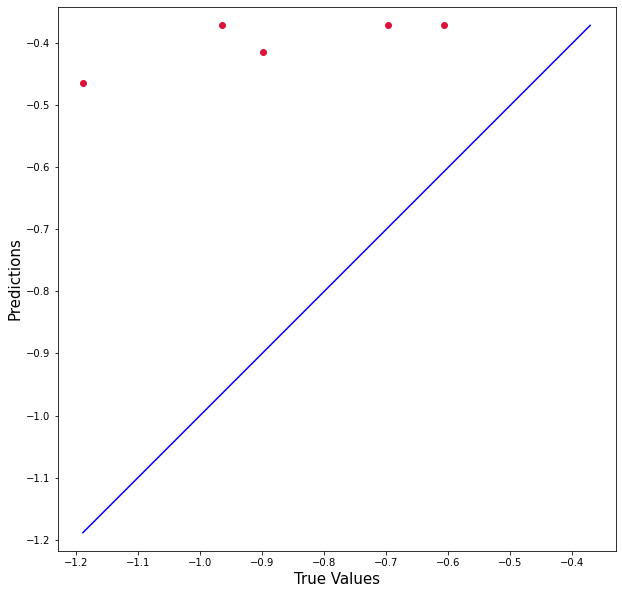

In [4]:
from src.make_data import make_data
from src.knn import euclidean_distance, manhattan_distance, cosine_distance, KNNRegressor
import matplotlib.pyplot as plt

%matplotlib inline

X, y = make_data(n_features=2, n_pts=300, noise=0.1)

# separate into training and test
X_train = X[5:]
y_train = y[5:]
X_test = X[:5]
y_test = y[:5]

# perform a KNN Regression using multiple distance functions
for f in [euclidean_distance, manhattan_distance, cosine_distance]:
    knn = KNNRegressor(k=3, distance=f)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f.__name__)
    print("Predictions", y_pred)
    print("Actual", y_test)
    print('*' * 50)

    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c='crimson')
    
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()